In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

df = pd.read_csv("../Datasets/compare_prophet.csv")

2023-04-23 12:53:48.594701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-23 12:53:48.594722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#df['ds']

In [3]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")

from utils.read_dataset import ReadDatasets
import numpy as np

dir_data = '../Datasets/sintetic_dataset/train_compressor_data.h5'

y_periodic = np.array(ReadDatasets.read_h5(dir_data))
y_periodic = np.concatenate([y_periodic, y_periodic, y_periodic])
#print(y_periodic.shape)
#raise()
x_time = pd.date_range("2018-01-01", periods=len(y_periodic),freq="H")

df = pd.DataFrame({'ds':x_time, 'y':y_periodic})

In [4]:
m = NeuralProphet(n_changepoints=10,
                  seasonality_mode="multiplicative",
                  weekly_seasonality=True,
                  daily_seasonality=False)

metrics = m.fit(df)

WARN - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 145
WARN - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (86) is too small than the required number for the learning rate finder (236). The results might not be optimal.


Finding best initial lr:   0%|          | 0/236 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [5]:
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 86it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [6]:
forecast

,ds,y,yhat1,trend,season_weekly
0,2018-01-01 00:00:00,0,28.168144,27.048162,1.119981
1,2018-01-01 01:00:00,0,28.150780,27.071981,1.078799
2,2018-01-01 02:00:00,0,28.129543,27.095798,1.033746
3,2018-01-01 03:00:00,0,28.104904,27.119616,0.985288
4,2018-01-01 04:00:00,0,28.077358,27.143433,0.933926
...,...,...,...,...,...
2725,2018-04-24 13:00:00,5,30.954805,30.351021,0.603785
2726,2018-04-24 14:00:00,4,31.012505,30.351665,0.660838
2727,2018-04-24 15:00:00,3,31.070311,30.352308,0.718002
2728,2018-04-24 16:00:00,2,31.127544,30.352951,0.774594


WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


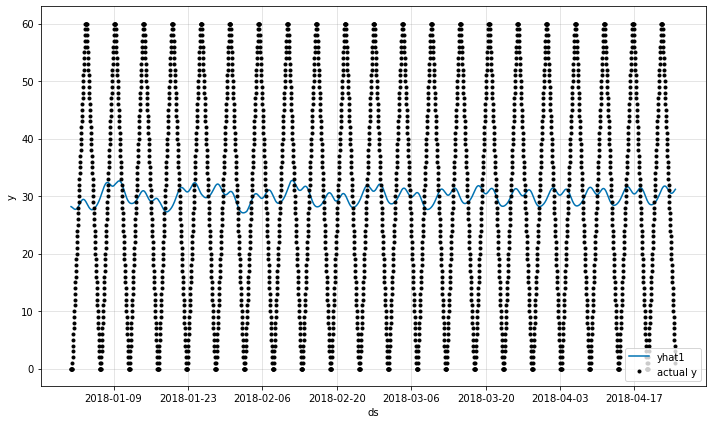

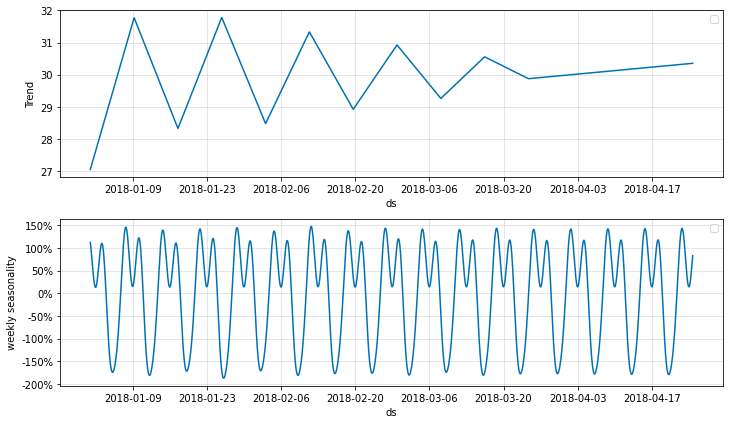

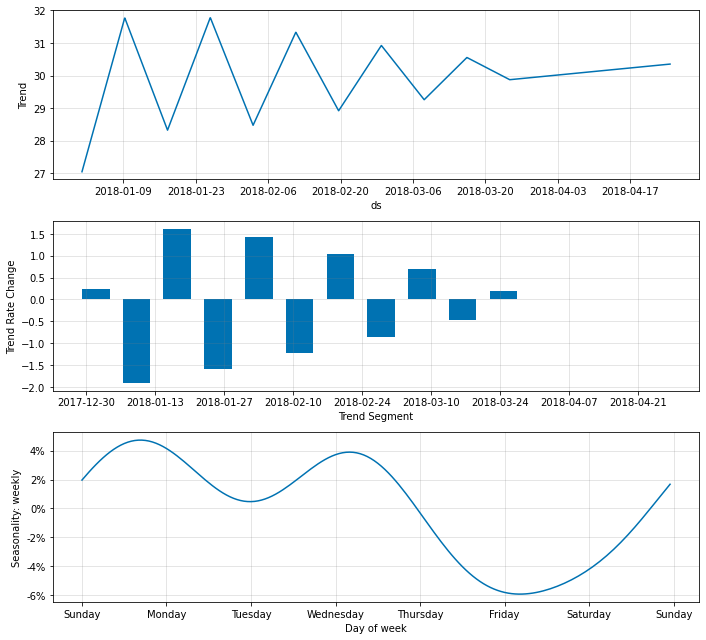

In [7]:
#m.set_plotting_backend('plotly')
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

### Avaliable model

In [8]:
import numpy as np

ground_truth = np.array(forecast["y"].tolist())
predicted = np.array(forecast["yhat1"].tolist())

In [9]:
ground_truth.shape, predicted.shape

((2730,), (2730,))

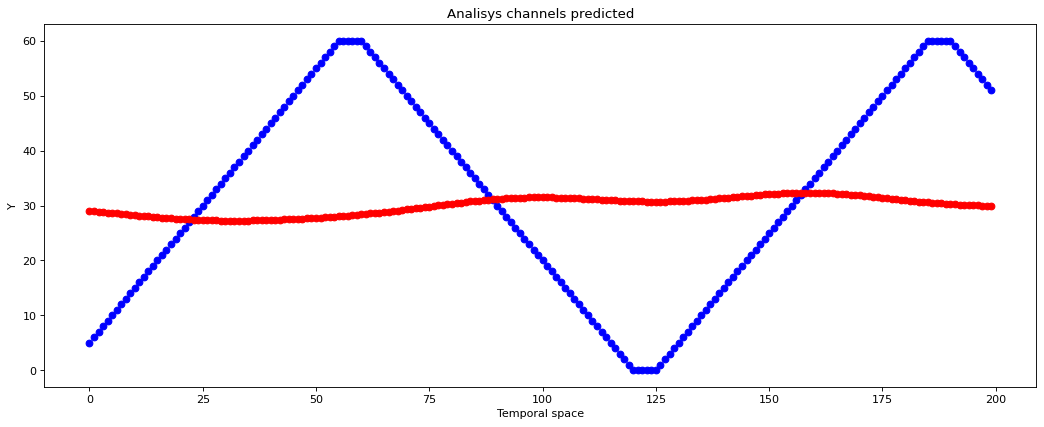

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
plt.plot(ground_truth[400:600], "o", color='blue', label='sinal Real')
plt.plot(predicted[400:600], "o", color='r', label='sinal previsto')

In [11]:
def smape_loss(y_pred, target):
    # y_pred = y_pred.squeeze(2)
    loss = 2 * abs((y_pred - target)) / (abs(y_pred) + abs(target) + 1e-8)
    return loss.mean() * 100


def mean_absolute_error(slice_data_true, slice_data_pred):
    abs_data = abs(slice_data_true - slice_data_pred)
    return abs_data.mean()


# Mean absolut error

def mean_square_error(slice_data_true, slice_data_pred):
    sum_square = 0
    for i, elem in enumerate(slice_data_true):
        sum_square += (slice_data_true[i] - slice_data_pred[i]) ** 2

    sum_square = sum_square / (i + 1)

    return sum_square


def define_df(vector_series):
    return pd.DataFrame({"temp_series": np.array(vector_series).astype(np.float),  # )
                         "ds": np.arange(len(vector_series))})


def avaliable_vector_auto_regressive_model(truth, prediction):
    mae = mean_absolute_error(truth, prediction)
    smape = smape_loss(prediction, truth)
    mse = mean_square_error(truth, prediction)

    print(f"Mean absolut error: {mae}")
    print(f"smape_loss: {smape}")
    print(f"mean square error: {mse}")


In [12]:
avaliable_vector_auto_regressive_model(ground_truth[400:600], predicted[400:600])

Mean absolut error: 16.75624689102173
smape_loss: 60.23022658758097
mean square error: 369.28156605699655
